In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from diagnostics.evaluation import fit_and_eval, weighted_quad_kappa
from imputers.zero_filler import ZeroFiller
from tools.datasets import get_boston, get_heart, get_houses, get_prudential
from sklearn.metrics import make_scorer, accuracy_score, f1_score, mean_squared_error
from config import BINNER_CONFIG
from transformers import LabelsClipper, OutliersClipper, CustomOneHotEncoder, CustomBinner, CustomBinaryBinner, FeatureDropper
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data, labels, continuous, discrete, dummy, categorical, target = get_boston()
data, labels, continuous, discrete, dummy, categorical, target = get_heart()
# data, labels, continuous, discrete, dummy, categorical, target = get_houses()
# data, labels, continuous, discrete, dummy, categorical, target = get_prudential()
# 
train = data.drop(target, axis=1)

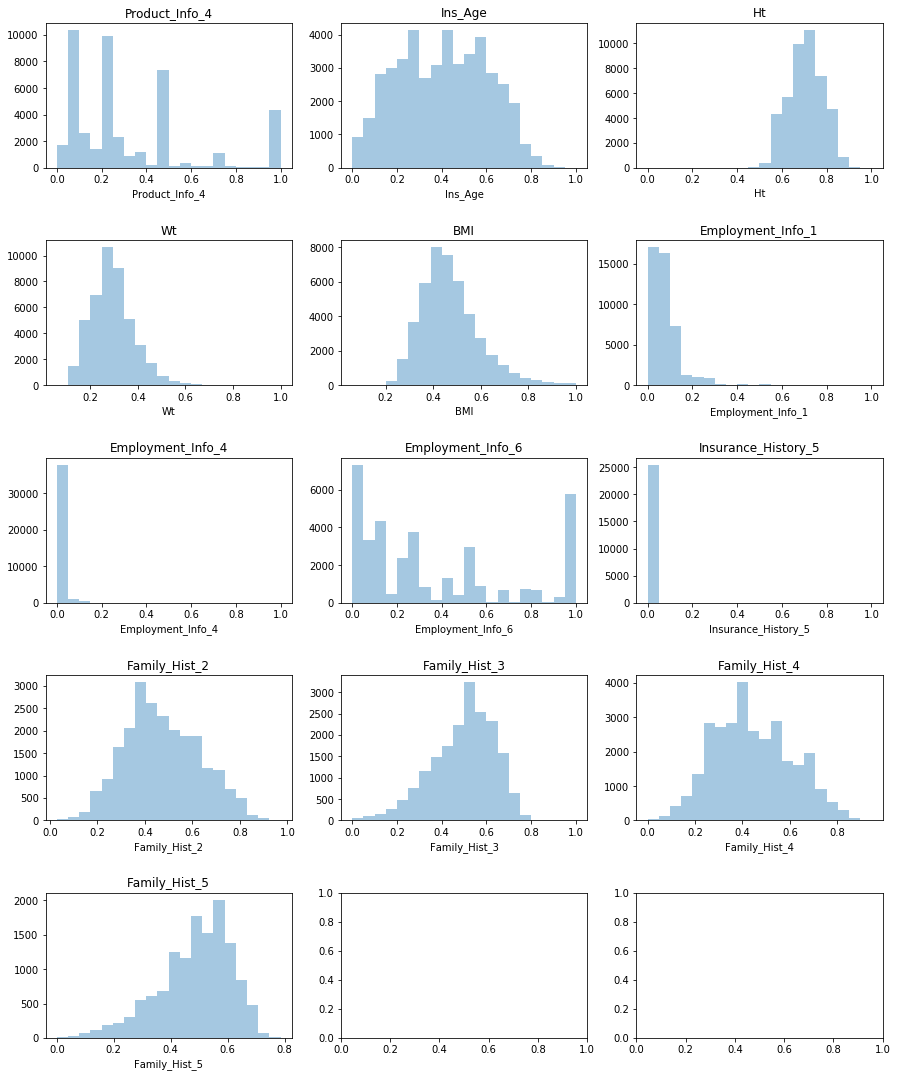

In [296]:
# i = 0
# fig, axes = plt.subplots(1, 2, figsize=(12,4))
# # plt.figure()
# for attr in ['chol', 'thalach']:
#     clean = data[attr].dropna()
#     sns.distplot(clean, bins=15, ax=axes[i%2], kde=None)
#     i += 1
# # fig.savefig('./figures/basic_preprocessing/heart_skewness.png')

i = 0
fig, axes = plt.subplots(int(math.ceil(len(continuous)/3)), 3, figsize=(15,12))
plt.subplots_adjust(top=1.3, hspace=0.5)
# plt.figure()
for attr in continuous:
    clean = data[attr].dropna()
    plot = sns.distplot(clean, bins=20, ax=axes[int(i/3)][i%3], kde=None)
    plot.set_title(attr)
    i += 1

In [5]:
from transformers.box_cox import BoxCoxTransformer
lambdas_per_column = {
    'Wt': 0.5,
}
boxcox = BoxCoxTransformer(lambdas_per_column)
transformed = data.copy()
transformed = boxcox.transform(transformed)
transformed[continuous].fillna(0).apply(lambda x: stats.skew(x))


Product_Info_4           1.217399
Ins_Age                  0.019976
Ht                      -0.083348
Wt                       0.227803
BMI                      0.951919
Employment_Info_1        4.765146
Employment_Info_4       16.814594
Employment_Info_6        1.038013
Insurance_History_5    166.827836
Family_Hist_2            0.448441
Family_Hist_3            0.616966
Family_Hist_4            0.112378
Family_Hist_5            1.126992
dtype: float64

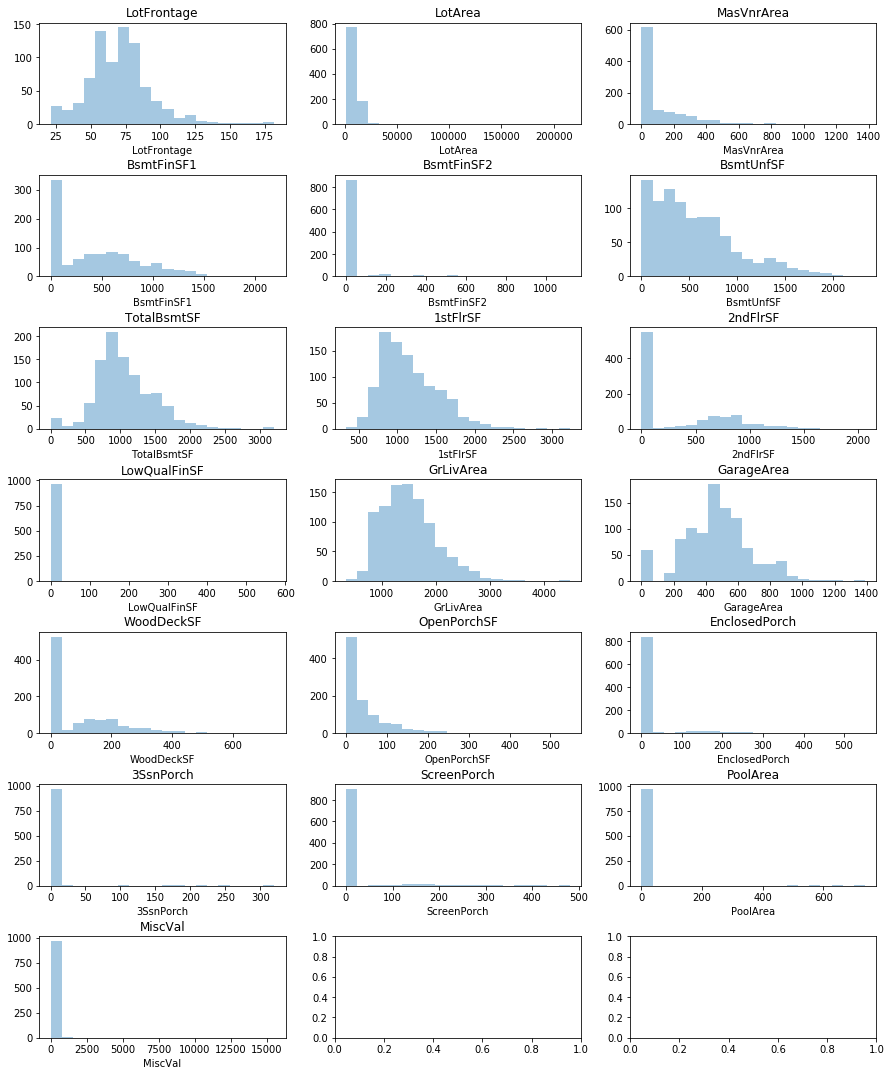

In [231]:
# i = 0
# fig, axes = plt.subplots(1, 2, figsize=(12,4))
# # plt.figure()
# for attr in ['chol', 'thalach']:
#     clean = transformed[attr].dropna()
#     sns.distplot(clean, bins=15, ax=axes[i%2], kde=None)
#     i += 1
# fig.savefig('./figures/basic_preprocessing/heart_skewness_after.png')
i = 0
fig, axes = plt.subplots(int(math.ceil(len(continuous)/3)), 3, figsize=(15,12))
plt.subplots_adjust(top=1.3, hspace=0.5)
# plt.figure()
for attr in continuous:
    clean = data[attr].dropna()
    plot = sns.distplot(clean, bins=20, ax=axes[int(i/3)][i%3], kde=None)
    plot.set_title(attr)
    i += 1

In [3]:
model = Pipeline([
        ('onehot',       CustomOneHotEncoder(columns=categorical)),
        ('zero_filler',  ZeroFiller()),
        # ('boxcox', BoxCoxTransformer(lambdas_per_column)),
        ('scale', StandardScaler()),
        ('classifier',   LogisticRegression()),                # for Heart Disease
        # ('classifier',   LabelsClipper(LinearRegression())), # for Prudential
        # ('regressor',    LinearRegression()),                # for Boston and Houses
])

scores = cross_val_score(model, train.copy(), labels, cv=3, n_jobs=-1, scoring=make_scorer(accuracy_score))
# scores = cross_val_score(model, train.copy(), labels, cv=KFold(3, shuffle=True, random_state=0), 
                         # n_jobs=-1, scoring=make_scorer(mean_squared_error))
# scores = cross_val_score(model, train.copy(), labels, cv=3, n_jobs=-1, scoring=make_scorer(weighted_quad_kappa))
# scores = np.sqrt(scores)


print('mean:', scores.mean(),'\nstd:', scores.std())

mean: 0.852209540532631 
std: 0.0010346894661787133
